In [1]:
from bridson import *
import matplotlib.pyplot as plt
import numpy as np
import gif
from scipy.spatial import distance
from colorline import *
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib import rcParams


In [2]:
def getindexofclosest(pt,pts):
    s1 = np.array(pts)
    s2 = np.array(pt).reshape(1,2)
    dd = (distance.cdist(s1,s2).min(axis=1))
    return np.argmin(dd)

In [65]:
@gif.frame
def plot(pts,c,old,infected,new,cycle,rate,prob,name,w,h,center):
    plt.subplots(1,1,figsize=(10,10),dpi=120)
    plt.xlim(center-w,center+w)
    plt.ylim(center-h,center+h)
    if old>0:
        plt.scatter(*zip(*pts[:old]),c=[COLOROLD]*old,s=s,zorder=100)
    if infected>0:
        plt.scatter(*zip(*pts[old:old+infected]),c=[COLOROLD]*infected,s=s,zorder=100)
    if new>0:
        oldpts = pts[:old+infected]
        newpts = pts[old+infected:old+infected+new]
        if 0<len(oldpts)<5000:
            for pt in newpts:
                neighbor = getindexofclosest(pt,oldpts)
                
                x = np.linspace(pt[0],oldpts[neighbor][0],100)
                y = np.linspace(pt[1],oldpts[neighbor][1],100)
                colorline(LOW,UP,x, y, cmap=plt.get_cmap(CMAP), linewidth=2)
        plt.scatter(*zip(*newpts),c=[COLORNEW]*new,s=s,zorder=100)
    plt.axis('off')
    if cycle<cmax:
        plt.text(center-0.99*w,center+0.99*h,
                 "Cycle {}:\n{} people are already infected.\n{} people got infected during the last cycle.".format(cycle+1,old+infected,new),
                 fontsize=20,horizontalalignment="left",verticalalignment="top",color ="dimgrey")
    else:
        plt.text(center-0.99*w,center+0.99*h,
                 "Cycle {}:\n{} people are infected.\nThe probability to die is {}%.".format(cycle+1,old+infected+new,name,prob*100),
                 fontsize=20,horizontalalignment="left",verticalalignment="top",color ="dimgrey")
    plt.title("{}".format(name,rate,prob*100),fontsize=30,color="dimgrey")
    plt.text(center+0.99*w,center-0.99*h,
                 "Assuming one person infects {} people on average.\nThe likelihood to die is {}%.".format(rate,prob*100),
                 fontsize=20,horizontalalignment="right",verticalalignment="bottom",color ="dimgrey")
    plt.text(center-0.99*w,center-0.99*h,"Source: Thomas Camminady\nInspired by: New York Times\nhttps://www.nytimes.com/interactive/2020/world/asia/china-coronavirus-contain.html",rotation=90,color ="lightgrey",fontsize=10)
    plt.tight_layout()
    
    
@gif.frame
def plotlastframe(pts,cols,cycle,n,ndead,name,rate,w,h,center):
    plt.subplots(1,1,figsize=(10,10),dpi = 120)
    plt.xlim(center-w,center+w)
    plt.ylim(center-h,center+h)
    
    plt.scatter(*zip(*pts),c=cols,s=s)
    plt.text(center-0.99*w,center+0.99*h,
                 "Cycle {}:\n{} people are infected.\nThis results in approximately {} deaths.".format(cycle+1,n,ndead,name,prob*100),
                 fontsize=20,horizontalalignment="left",verticalalignment="top",color ="dimgrey")
    plt.title("{}".format(name,rate,prob*100),fontsize=30,color="dimgrey")
    plt.text(center+0.99*w,center-0.99*h,
                 "Assuming one person infects {} people on average.\nThe likelihood to die is {}%.".format(rate,prob*100),
                 fontsize=20,horizontalalignment="right",verticalalignment="bottom",color ="dimgrey")
    plt.text(center-0.99*w,center-0.99*h,"Source: Thomas Camminady\nInspired by: New York Times\nhttps://www.nytimes.com/interactive/2020/world/asia/china-coronavirus-contain.html",rotation=90,color ="lightgrey",fontsize=10)

    plt.axis('off')
    plt.tight_layout()

In [66]:
def createvideo(name,rate,prob):
    plt.style.use('fivethirtyeight')
    rcParams['font.family'] = 'hack'
    rcParams['font.sans-serif'] = ['hack']
    
    w,h = 100,100
    pts = poisson_disc_samples(w,h,0.7)
    center = w/2
    w,h = 25,25
    c = np.arange(0,len(pts))

    
    oldinfected = 0
    infected = 0
    newlyinfected = 3
    
    frames = []
    for cycle in range(cmax):
        print(cycle)
        print(oldinfected,infected,newlyinfected)
        frame = plot(pts,c,oldinfected,infected,newlyinfected,cycle,rate,prob,name,w,h,center)
        frames.append(frame)
        if cycle <cmax-1:
            oldinfected += infected
            infected = newlyinfected
            newlyinfected = int(infected*rate)
    infected += newlyinfected
    newlyinfected = 0
    #for _ in range(2):
    #    frame = plot(pts,c,oldinfected,infected,newlyinfected,cycle,rate,prob,name)
    #    frames.append(frame)


    while True:
        cols = [ COLORBLACK if np.random.rand()<prob else COLOROLD for _ in range(oldinfected+newlyinfected+infected)]
        count = 0
        for col in cols:
            if col == COLORBLACK:
                count += 1
        ndead = count

        if ndead == int(prob*(oldinfected+newlyinfected+infected)):
            break

    for i in range(len(cols)):
        col = cols[i]
        if not(col==COLORBLACK):
            cols[i] = (0.747127, 0.222378, 0.322856, 0.1)

    ALPHAS = [1 if col==COLORBLACK else 0.3 for col in cols]

    for _ in range(3):
        frame = plotlastframe(pts[:oldinfected+newlyinfected+infected],cols,cmax-1,len(cols),ndead,name,rate,w,h,center)
        frames.append(frame)

    gif.save(frames, "{}.gif".format(name), duration=2000)

0
0 0 3
1
0 3 4
2
3 4 6
3
7 6 9
4
13 9 13
0
0 0 3
1
0 3 10
2
3 10 35
3
13 35 122
4
48 122 427
0
0 0 3
1
0 3 6
2
3 6 13
3
9 13 28
4
22 28 61
0
0 0 3
1
0 3 21
2
3 21 147
3
24 147 1029
4
171 1029 7203
0
0 0 3
1
0 3 2
2
3 2 1
3
5 1 0
4
6 0 0
0
0 0 3
1
0 3 12
2
3 12 48
3
15 48 192
4
63 192 768
0
0 0 3
1
0 3 45
2
3 45 675
3
48 675 10125


ValueError: 'c' argument has 10125 elements, which is not acceptable for use with 'x' with size 9617, 'y' with size 9617.

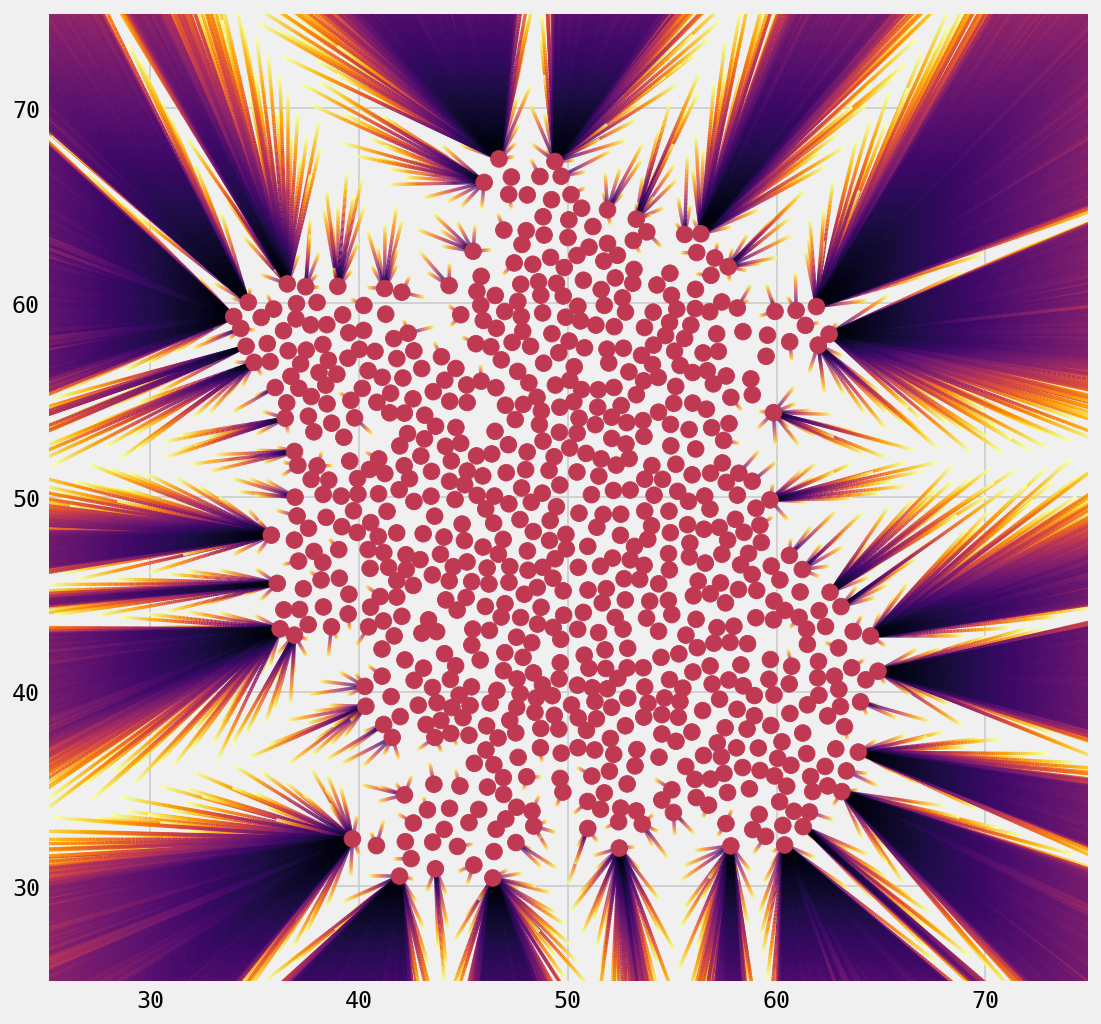

In [67]:
cmax = 5
s = 100
CMAP = 'inferno'
thiscm = cm.get_cmap(CMAP,50)
CMAP = 'inferno_r'
LOW, UP = 0.5, 0.8
COLORNEW = thiscm(UP)
COLOROLD = thiscm(LOW)
COLORBLACK = thiscm(0.0)



names = ['Corona Virus (best case)','Corona Virus (worst case)','SARS','Chickenpox','MERS','Smallpox','Measles']
rates = [1.5,3.5,2.2,7,0.7,4,15]
probs = [0.03,0.03,0.1,0.0,0.3,0.3,0.002]
for name,rate,prob in zip(names,rates,probs):

    createvideo(name,rate,prob)